In [336]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf

In [337]:
#df = pd.read_csv('crypto.csv', index_col=[0], parse_dates=[0])
#df.rename(index={0:'Date'}, inplace=True)
#df.head()

In [338]:
df = yf.download(tickers = 'btc-usd', start='2016-01-01', end='2021-05-21')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [339]:
### Creando variables
df['returns'] = df['Adj Close'].pct_change()*100

df['Month'] = df.index.month
df['year'] = df.index.year
df['week'] = df.index.week
df.head()
df.head()

/Users/diana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,Open,High,Low,Close,Adj Close,Volume,returns,Month,year,week
Date,,,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,NaN,1,2016,53
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.206299,1,2016,53
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.790656,1,2016,53
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.716265,1,2016,1
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.261149,1,2016,1


In [340]:
print(df.index.min())
print(df.index.max())

2016-01-01 00:00:00
2021-05-21 00:00:00


In [341]:
summary = round(df[['Adj Close','returns']].describe().T,2)
summary

,count,mean,std,min,25%,50%,75%,max
Adj Close,1964.0,9177.07,12170.45,364.33,1572.96,6676.05,9730.78,63503.46
returns,1963.0,0.31,3.99,-37.17,-1.22,0.21,1.81,25.25


In [342]:
# medidas resumen
summary['cv']=summary['std']/summary['mean']*100
summary['u-1std']= round(summary['mean']-1*summary['std'])
summary['u+1std']= round(summary['mean']+1*summary['std'])
#summary['IQR']= round(summary['75%']- summary['25%'],2)
#summary['1.5_Atip_inf']= round(summary['75%']- 1.5*summary['IQR'],2)
#summary['1.5_Atip_sup']= round(summary['75%']+ 1.5*summary['IQR'],2)
#summary['Atip_inf']= round(summary['25%']- 1.5*summary['IQR'],2)
#summary['Atip_sup']= round(summary['75%']+ 1.5*summary['IQR'],2)
summary['LCI']= round(summary['mean']- 3*summary['std']/np.sqrt(summary['count']),2)
summary['LCS']= round(summary['mean']+ 3*summary['std']/np.sqrt(summary['count']),2)
summary.head()
summary

,count,mean,std,min,25%,50%,75%,max,cv,u-1std,u+1std,LCI,LCS
Adj Close,1964.0,9177.07,12170.45,364.33,1572.96,6676.05,9730.78,63503.46,132.618036,-2993.0,21348.0,8353.20,10000.94
returns,1963.0,0.31,3.99,-37.17,-1.22,0.21,1.81,25.25,1287.096774,-4.0,4.0,0.04,0.58


<AxesSubplot:xlabel='Date'>

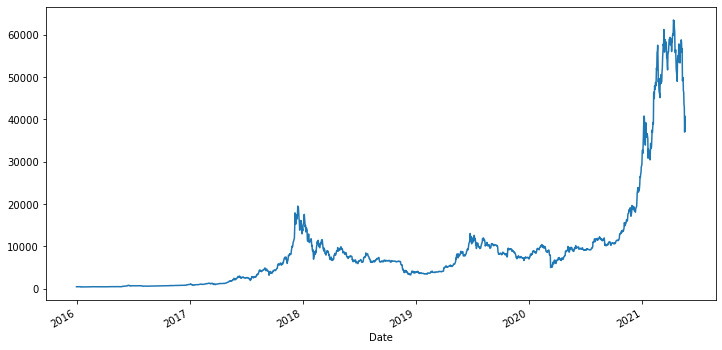

In [343]:
df['Adj Close'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

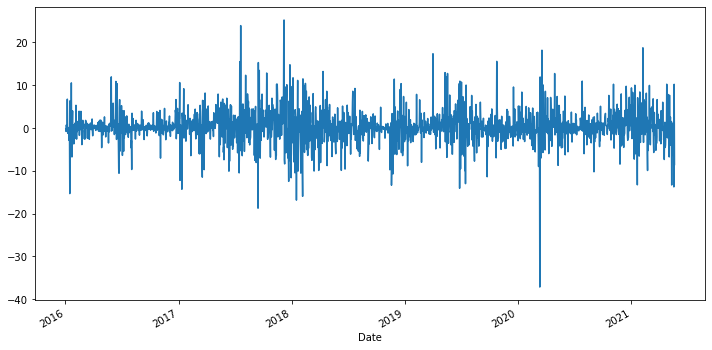

In [344]:
df['returns'].plot(figsize=(12,6))

<AxesSubplot:>

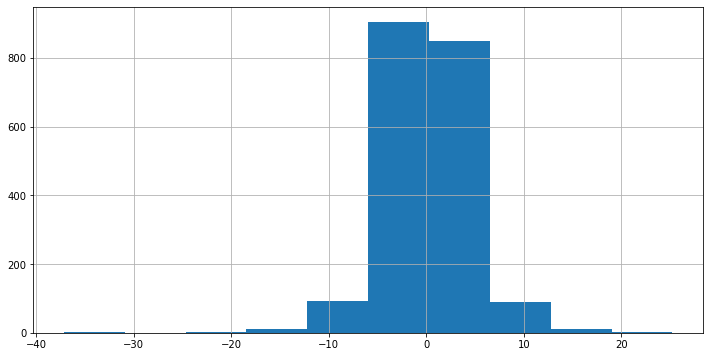

In [345]:
df['returns'].hist(figsize=(12,6))

In [346]:
variable = 'returns'

In [367]:
btc_summary = df[['returns','week']]['2021'].groupby('week').describe().sort_values(by=('returns', 'mean'), ascending=False)

In [368]:
btc_summary['returns', 'cv']= round(btc_summary['returns', 'std']/btc_summary['returns', 'mean']*100,2)
btc_summary['returns', 'u-std']= round(btc_summary['returns', 'mean']-1*btc_summary['returns', 'std'])
btc_summary['returns', 'LCI']= round(btc_summary['returns', 'mean']- 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'LCS']= round(btc_summary['returns', 'mean']+ 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'IQR']= round(btc_summary['returns', '75%']- btc_summary['returns', '25%'],2)
btc_summary['returns', '1.5_Atip_inf']= round(btc_summary['returns', '75%']- 1.5*btc_summary['returns', 'IQR'],2)
btc_summary['returns', '1.5_Atip_sup']= round(btc_summary['returns', '75%']+ 1.5*btc_summary['returns', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

returns                                                               \
       count      mean       std        min       25%       50%       75%   
week                                                                        
53       3.0  4.231585  4.468156   1.284171  1.661089  2.038007  5.705292   
6        7.0  3.485140  7.478452  -3.362489 -0.842442  0.616152  5.040364   
7        7.0  2.459352  3.577922  -1.585126 -0.260759  2.567626  4.305692   
1        7.0  2.381756  5.175331  -4.715257 -1.901157  3.623390  6.617702   
5        7.0  2.363443  2.891719  -1.457147  0.176734  2.940683  4.411868   
17       7.0  2.187822  4.932908  -2.315733 -1.224295  0.134848  4.852659   
10       7.0  2.166664  3.361688  -3.168961  0.606168  2.160424  4.070597   
9        7.0  1.913885  4.789287  -3.912036 -1.276807  0.753970  4.576928   
13       7.0  0.719232  2.006024  -2.998135  0.151155  0.488197  2.013057   
18       7.0  0.482728  4.421739  -6.760025 -1.380559  1.005128  2.112754   
4        7.0  0.460382  4.837396  -6.562212 -1.753691  0.238511  2.313903   
14       7.0  0.375839  2.550131  -3.683339 -0.800454  0.509414  1.673362   
12       7.0 -0.331651  3.869935  -5.205319 -2.808442 -0.040672  0.950663   
11       7.0 -0.395729  2.971857  -5.725100 -1.537047 -0.056572  1.224334   
2        7.0 -0.818851  6.262721  -7.273316 -5.324405 -1.757556  1.972237   
15       7.0 -0.906060  3.983062  -7.362155 -2.096953 -0.620063 -0.096835   
3        7.0 -1.285084  6.236932 -13.283684 -2.185912 -1.447345  1.517522   
16       7.0 -1.925353  1.970871  -4.545429 -3.034023 -2.040929 -1.083381   
19       7.0 -3.044039  5.361623 -13.321745 -5.164937 -0.650401  0.740714   
8        7.0 -3.339183  3.932928  -9.930199 -5.522885 -2.274775 -0.963885   
20       5.0 -3.960616  9.079205 -13.766123 -8.528233 -6.282382 -1.442686   

                                                                              
            max       cv u-std    LCI    LCS   IQR 1.5_Atip_inf 1.5_Atip_sup  
week                                                                          
53     9.372578   105.59  -0.0  -3.51  11.97  4.04        -0.35        11.77  
6     18.746474   214.58  -4.0  -4.99  11.96  5.88        -3.78        13.86  
7      8.143097   145.48  -1.0  -1.60   6.52  4.57        -2.55        11.16  
1      8.331071   217.29  -3.0  -3.49   8.25  8.52        -6.16        19.40  
5      5.883361   122.35  -1.0  -0.92   5.64  4.24        -1.95        10.77  
17    10.238907   225.47  -3.0  -3.41   7.78  6.08        -4.27        13.97  
10     6.821653   155.16  -1.0  -1.65   5.98  3.46        -1.12         9.26  
9      9.955017   250.24  -3.0  -3.52   7.34  5.85        -4.20        13.35  
13     3.216138   278.91  -1.0  -1.56   2.99  1.86        -0.78         4.80  
18     7.669599   915.99  -4.0  -4.53   5.50  3.49        -3.12         7.35  
4      8.425954  1050.73  -4.0  -5.02   5.95  4.07        -3.79         8.42  
14     4.058981   678.52  -2.0  -2.52   3.27  2.47        -2.03         5.38  
12     6.639992 -1166.87  -4.0  -4.72   4.06  3.76        -4.69         6.59  
11     3.636996  -750.98  -3.0  -3.77   2.97  2.76        -2.92         5.36  
2     10.003250  -764.82  -7.0  -7.92   6.28  7.30        -8.98        12.92  
15     6.027376  -439.60  -5.0  -5.42   3.61  2.00        -3.10         2.90  
3      7.072224  -485.33  -8.0  -8.36   5.79  3.70        -4.03         7.07  
16     1.343698  -102.36  -4.0  -4.16   0.31  1.95        -4.01         1.84  
19     1.512317  -176.14  -8.0  -9.12   3.04  5.91        -8.12         9.61  
8      1.804233  -117.78  -7.0  -7.80   1.12  4.56        -7.80         5.88  
20    10.216344  -229.24 -13.0 -16.14   8.22  7.09       -12.08         9.19

In [369]:
btc_summary = df[['returns','Month']]['2021'].groupby('Month').describe().sort_values(by=('returns', 'mean'), ascending=False)

In [370]:
btc_summary['returns', 'cv']= round(btc_summary['returns', 'std']/btc_summary['returns', 'mean']*100,2)
btc_summary['returns', 'u-std']= round(btc_summary['returns', 'mean']-1*btc_summary['returns', 'std'])
btc_summary['returns', 'LCI']= round(btc_summary['returns', 'mean']- 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'LCS']= round(btc_summary['returns', 'mean']+ 3*btc_summary['returns', 'std']/np.sqrt(btc_summary['returns', 'count']),2)
btc_summary['returns', 'IQR']= round(btc_summary['returns', '75%']- btc_summary['returns', '25%'],2)
btc_summary['returns', '1.5_Atip_inf']= round(btc_summary['returns', '75%']- 1.5*btc_summary['returns', 'IQR'],2)
btc_summary['returns', '1.5_Atip_sup']= round(btc_summary['returns', '75%']+ 1.5*btc_summary['returns', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

returns                                                               \
        count      mean       std        min       25%       50%       75%   
Month                                                                        
2        28.0  1.242188  5.293818  -9.930199 -1.489142  0.497192  3.329760   
3        31.0  0.926190  3.635405  -5.725100 -1.537047  0.753970  3.211905   
1        31.0  0.576199  5.509492 -13.283684 -2.656745  0.238511  4.506502   
4        30.0 -0.004810  3.613850  -7.362155 -2.078557 -0.448063  1.179921   
5        21.0 -1.888919  5.889913 -13.766123 -6.255642 -0.971810  1.150865   

                                                                              
             max        cv u-std   LCI   LCS   IQR 1.5_Atip_inf 1.5_Atip_sup  
Month                                                                         
2      18.746474    426.17  -4.0 -1.76  4.24  4.82        -3.90        10.56  
3       9.955017    392.51  -3.0 -1.03  2.89  4.75        -3.91        10.34  
1      10.003250    956.18  -5.0 -2.39  3.54  7.16        -6.23        15.25  
4      10.238907 -75129.79  -4.0 -1.98  1.97  3.26        -3.71         6.07  
5      10.216344   -311.81  -8.0 -5.74  1.97  7.41        -9.96        12.27

In [371]:
variable = 'Adj Close'

In [372]:
btc_summary = round(df[[variable,'Month']]['2021'].groupby('Month').describe().sort_values(by=(variable, 'mean'), ascending=False),2)

In [373]:
btc_summary[variable, 'cv']= round(btc_summary[variable, 'std']/btc_summary[variable, 'mean']*100,2)
btc_summary[variable, 'u-std']= round(btc_summary[variable, 'mean']-1*btc_summary[variable, 'std'])
btc_summary[variable, 'LCI']= round(btc_summary[variable, 'mean']- 3*btc_summary[variable, 'std']/np.sqrt(btc_summary[variable, 'count']),2)
btc_summary[variable, 'LCS']= round(btc_summary[variable, 'mean']+ 3*btc_summary[variable, 'std']/np.sqrt(btc_summary[variable, 'count']),2)
btc_summary[variable, 'IQR']= round(btc_summary[variable, '75%']- btc_summary[variable, '25%'],2)
btc_summary[variable, '1.5_Atip_inf']= round(btc_summary[variable, '75%']- 1.5*btc_summary[variable, 'IQR'],2)
btc_summary[variable, '1.5_Atip_sup']= round(btc_summary[variable, '75%']+ 1.5*btc_summary[variable, 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_inf']= round(btc_summary['BTC/USDT', '25%']- 1.5*btc_summary['BTC/USDT', 'IQR'],2)
#btc_summary['BTC/USDT', 'Atip_sup']= round(btc_summary['BTC/USDT', '75%']+ 1.5*btc_summary['BTC/USDT', 'IQR'],2)

btc_summary

Adj Close                                                             \
          count      mean      std       min       25%       50%       75%   
Month                                                                        
4          30.0  57206.72  3801.39  49004.25  54876.81  57971.27  59691.00   
3          31.0  54998.01  3713.97  48378.99  51975.34  55950.75  57832.02   
5          21.0  50917.65  7267.10  37002.44  46456.06  53333.54  57200.29   
2          28.0  46306.80  6380.97  33537.18  43505.14  47099.68  49326.24   
1          31.0  34703.05  2988.07  29374.15  32327.89  34269.52  36727.22   

                                                                            \
            max     cv    u-std       LCI       LCS       IQR 1.5_Atip_inf   
Month                                                                        
4      63503.46   6.65  53405.0  55124.61  59288.83   4814.19     52469.72   
3      61243.09   6.75  51284.0  52996.86  56999.16   5856.68     49047.00   
5      58803.78  14.27  43651.0  46160.22  55675.08  10744.23     41083.94   
2      57539.95  13.78  39926.0  42689.13  49924.47   5821.10     40594.59   
1      40797.61   8.61  31715.0  33093.03  36313.07   4399.33     30128.22   

                    
      1.5_Atip_sup  
Month               
4         66912.28  
3         66617.04  
5         73316.63  
2         58057.89  
1         43326.22